# <center> <span style="color:#404b83"> Desarrollo de Proyecto I </span> </center> 
##  <center> <span style="color:#2b4054"> Proyecto de Análisis EDA </span> </center>
##  <center> <span style="color:#2b4054"> Gustavo Mendoza Navarro </span> </center>
##  <center> <span style="color:#2b4054"> gustavo.mendoza3889@alumnos.udg.mx </span> </center>
##  <center> <span style="color:#2b4054"> Octubre de 2023 </span> </center>

##  Contenido
1. <span style="color:DarkBlue"> Lectura del archivo </span>
2. <span style="color:DarkBlue"> Descripción de los datos </span>
3. <span style="color:DarkBlue"> Información general de la base de datos </span>
4. <span style="color:DarkBlue"> Limpieza de datos </span>
5. <span style="color:DarkBlue"> Visualización de datos </span>
6. <span style="color:DarkBlue"> Comentarios adicionales y conclusiones </span>

In [ ]:
# !pip install squarify (algorithm for treemap
# !pip install mpldatacursor

In [1]:
# Import libraries
import pandas as pd             #<--For data analysis and manipulation  
import matplotlib.pyplot as plt #<--Visualization tool
import squarify                 #<--For treemap
import altair as alt
import numpy as np
from mpldatacursor import datacursor

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

Para este proyecto utilizaremos la base de datos [Matches of the Liga MX of the 2016-2020 seasons](https://www.kaggle.com/datasets/gerardojaimeescareo/ligamx-matches-2016-2022/ "Click here to go to the dataset in Kaggle")

Esta base de datos contiene información de los encuentros en el futbol mexicano a partir del 2016; asimismo, contiene información como el arbitro del encuentro, lugar (estadio y ciudad), y demás variables relacionadas al encuentro como los goles, el equipo que gano (visitante o local), si los goles fueron de penal, etc.

In [2]:
# Load dataset
path = r'C:\Users\gmend\Downloads\archive (1)'#<--File's directory
file_name = r'\2016-2022_liga_mx.csv'         #<--File's name
file = path+file_name                         #<--Concatenate 

df_0 = pd.read_csv(file) #<--To create a dataframe

## 2. Descripción de los datos

In [3]:
# Head of the database
df_0.head() #<--5 by default

,id,referee,timezone,date,venue_id,venue_name,venue_city,season,round,home_team,...,home_goals,away_goals,home_goals_half_time,away_goals_half_time,home_goals_fulltime,away_goals_fulltime,home_goals_extra_time,away_goals_extratime,home_goals_penalty,away_goals_penalty
0,864094,L. Santander,UTC,2022-07-02T22:00:00+00:00,1080.0,Estadio Victoria de Aguascalientes,Aguascalientes,2022,Apertura - 1,Necaxa,...,1.0,3.0,1.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN
1,864095,D. Quintero,UTC,2022-07-02T02:05:00+00:00,10546.0,Estadio de Mazatlán,Mazatlán,2022,Apertura - 1,Mazatlán,...,2.0,4.0,0.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN
2,864096,I. Lopez,UTC,2022-07-02T22:00:00+00:00,1076.0,Estadio AKRON,Zapopan,2022,Apertura - 1,Guadalajara Chivas,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,864097,Ó. Mejía,UTC,2022-07-03T00:05:00+00:00,1087.0,Estadio Universitario de Nuevo León,San Nicolás de los Garza,2022,Apertura - 1,Tigres UANL,...,2.0,3.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
4,864098,F. Guerrero,UTC,2022-07-03T02:05:00+00:00,7182.0,Estadio Azteca,D.F.,2022,Apertura - 1,Club America,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Variables
df_0.columns #<--To print an index which contains a list with all of the variables

Index(['id', 'referee', 'timezone', 'date', 'venue_id', 'venue_name',
       'venue_city', 'season', 'round', 'home_team', 'away_team', 'home_win',
       'away_win', 'home_goals', 'away_goals', 'home_goals_half_time',
       'away_goals_half_time', 'home_goals_fulltime', 'away_goals_fulltime',
       'home_goals_extra_time', 'away_goals_extratime', 'home_goals_penalty',
       'away_goals_penalty'],
      dtype='object')

In [5]:
df_0.info() #<--To print overall information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2366 non-null   int64  
 1   referee                2095 non-null   object 
 2   timezone               2366 non-null   object 
 3   date                   2366 non-null   object 
 4   venue_id               1507 non-null   float64
 5   venue_name             2366 non-null   object 
 6   venue_city             2185 non-null   object 
 7   season                 2366 non-null   int64  
 8   round                  2366 non-null   object 
 9   home_team              2366 non-null   object 
 10  away_team              2366 non-null   object 
 11  home_win               1685 non-null   object 
 12  away_win               1685 non-null   object 
 13  home_goals             2303 non-null   float64
 14  away_goals             2303 non-null   float64
 15  home

In [6]:
df_0.describe() #<--To print statistic information related to the cuantitative variables

,id,venue_id,season,home_goals,away_goals,home_goals_half_time,away_goals_half_time,home_goals_fulltime,away_goals_fulltime,home_goals_extra_time,away_goals_extratime,home_goals_penalty,away_goals_penalty
count,2.366000e+03,1507.000000,2366.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,12.000000,12.000000,11.00000,11.000000
mean,4.261048e+05,2407.382880,2019.020287,1.484151,1.142857,0.666956,0.515849,1.482848,1.141554,0.250000,0.250000,3.00000,3.000000
std,3.198069e+05,2878.619437,2.000320,1.214088,1.060711,0.807640,0.706545,1.213355,1.060272,0.621582,0.452267,1.48324,1.612452
min,1.201580e+05,1071.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
25%,1.435022e+05,1081.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.00000,2.000000
50%,2.917765e+05,1085.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.00000,4.000000
75%,7.218138e+05,1795.000000,2021.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.250000,3.50000,4.000000
max,1.028349e+06,11905.000000,2022.000000,9.000000,6.000000,6.000000,5.000000,9.000000,6.000000,2.000000,1.000000,6.00000,5.000000


In [7]:
df_0.nunique() #<--To print the number of unique terms per variable

id                       2366
referee                    69
timezone                    1
date                     2109
venue_id                   21
venue_name                 53
venue_city                 25
season                      7
round                      46
home_team                  22
away_team                  23
home_win                    2
away_win                    2
home_goals                  9
away_goals                  7
home_goals_half_time        6
away_goals_half_time        6
home_goals_fulltime         9
away_goals_fulltime         7
home_goals_extra_time       3
away_goals_extratime        2
home_goals_penalty          6
away_goals_penalty          5
dtype: int64

## 3. Información general de la base de datos

In [8]:
# fechas
print("- El rango de fechas va desde {0} hasta {1}.".format(df_0.date.unique().min(), df_0.date.unique().max()))

- El rango de fechas va desde 2016-07-16T02:00:00+00:00 hasta 2023-05-29T01:35:00+00:00.


In [9]:
def unique_values(df, column):
    """
    Esta función itera por cada uno de los valores de la columna dada y devuelve los valores únicos.
    
    Args:
        df: DataFrame.
        column: Columna a iterar.
    
    Returns:
        Valores únicos de la columna
    """
    for i in df[column].unique():
        print("    * "+i)

In [10]:
# Arbitros que han dirigido
print("- En la base de datos han dirigido {0} arbitros distintos:".format(len(df_0.referee.unique())))
unique_values(df_0, 'referee')

- En la base de datos han dirigido 70 arbitros distintos:
    * L. Santander
    * D. Quintero
    * I. Lopez
    * Ó. Mejía
    * F. Guerrero
    * A. Escobedo
    * F. Hernández
    * J. Pérez
    * C. Ramos
    * Ó. Macías
    * V. Cáceres
    * M. Ortíz
    * J. Lopez
    * E. Miranda
    * E. Galván
    * J. Camacho
    * D. Montaño
    * B. González
    * G. Pacheco
    * E. Morales
    * Marco Antonio Ortiz Nava, Mexico
    * Jorge Antonio Perez Duran, Mexico
    * Jorge Isaac Rojas Castillo, Mexico
    * Alejandro Funk Villafane, Mexico
    * Eduardo Galvan Basulto, Mexico
    * Luis Santander, Mexico
    * Oscar Mejia Garcia, Mexico
    * Oscar Macias, Mexico
    * Diego Montano, Mexico
    * Edgar Ulises Rangel Araujo, Mexico
    * Fernando Guerrero Ramirez, Mexico
    * Fernando Hernandez, Mexico
    * Adonai Escobedo Gonzalez, Mexico
    * Victor Alfonso Caceres Hernandez, Mexico
    * Daniel Quintero Huittron, Mexico
    * Mario Humberto Vargas Mata, Mexico
    * Cesar Art

TypeError: can only concatenate str (not "float") to str

Podemos observar que debido a la forma en que se llenó este campo, existen algunos valores que tienen el mismo significado, pero estan escritos de distinta manera, como "*L. Santander*" y "*Luis Santander, Mexico*" (además, el país está por demás dado que todos los arbitros son mexicanos).

Por otro lado, el error que devuelve se debe a que existen valores nulos dentro de la serie.

In [11]:
# Estadios en los que se han jugado los partidos
print("- En la base de datos se ha jugado en {0} estadios distintos:".format(len(df_0.venue_name.unique())))
unique_values(df_0, 'venue_name')

- En la base de datos se ha jugado en 53 estadios distintos:
    * Estadio Victoria de Aguascalientes
    * Estadio de Mazatlán
    * Estadio AKRON
    * Estadio Universitario de Nuevo León
    * Estadio Azteca
    * Estadio Olímpico de Universitario
    * Estadio Alfonso Lastras Ramírez
    * Estadio Nuevo Corona
    * Estadio Hidalgo
    * Estadio Cuauhtémoc
    * Estadio Caliente
    * Estadio BBVA
    * Estadio Nemesio Díez
    * Estadio La Corregidora
    * Estadio León
    * Estadio Olímpico Benito Juárez
    * Estadio Jalisco
    * Estadio Leon
    * Estadio Generalísimo José María Morelos y Pavón
    * Estadio BBVA Bancomer
    * Estadio Nuevo Corona (Torreón)
    * Estadio Nemesio Díez (Toluca de Lerdo)
    * Estadio Azteca (Ciudad de México (D.F.))
    * Estadio Caliente (Tijuana)
    * Estadio Olímpico de Universitario (Ciudad de México (D.F.))
    * Estadio BBVA Bancomer (Guadalupe)
    * Estadio Universitario de Nuevo León (San Nicolás de los Garza)
    * Estadio Generalís

In [12]:
# Ciudades en las que se han jugado los partidos
print("- En la base de datos se ha jugado en {0} ciudades distintas:".format(len(df_0.venue_city.unique())))
unique_values(df_0, 'venue_city')

- En la base de datos se ha jugado en 26 ciudades distintas:
    * Aguascalientes
    * Mazatlán
    * Zapopan
    * San Nicolás de los Garza
    * D.F.
    * San Luis Potosí
    * Torreón
    * Pachuca de Soto
    * Puebla
    * Tijuana
    * Guadalupe
    * Toluca de Lerdo
    * Santiago de Querétaro
    * León de los Aldamas
    * Ciudad Juárez
    * Guadalajara
    * Leon
    * Morelia


TypeError: can only concatenate str (not "float") to str

El error que obtenemos se deriva de que existen valores nulos en la serie

In [13]:
# Equipos distintos
print("- En la base de datos existen {0} equipos distintos:".format(len(df_0.home_team.unique())))
unique_values(df_0, 'home_team')

- En la base de datos existen 22 equipos distintos:
    * Necaxa
    * Mazatlán
    * Guadalajara Chivas
    * Tigres UANL
    * Club America
    * U.N.A.M. - Pumas
    * Atletico San Luis
    * Santos Laguna
    * Pachuca
    * Puebla
    * Club Tijuana
    * Cruz Azul
    * Monterrey
    * Toluca
    * Club Queretaro
    * Leon
    * FC Juarez
    * Atlas
    * Monarcas
    * Lobos Buap
    * Veracruz
    * Jaguares de Chiapas


In [14]:
# Estadísticas del local
print("- El número de victorias del equipo local es {0}".format(df_0.home_win.sum()))
print("- Se metieron un total de {0} goles, de los cuales {1} cayeron por la vía penal".format(df_0.home_goals.sum(),
              df_0.home_goals_penalty.sum()))
print("- Se metieron {0} goles en la primera mitad, {1} goles en la segunda mitad \
y {2} goles en el tiempo añadido".format(df_0.home_goals_half_time.sum(),
                                        df_0.home_goals_fulltime.sum()-df_0.home_goals_half_time.sum(),
                                        df_0.home_goals_extra_time.sum()))

- El número de victorias del equipo local es 1025
- Se metieron un total de 3418.0 goles, de los cuales 33.0 cayeron por la vía penal
- Se metieron 1536.0 goles en la primera mitad, 1879.0 goles en la segunda mitad y 3.0 goles en el tiempo añadido


In [15]:
# Estadísticas del visitante
print("- El número de victorias del equipo visitante es {0}".format(df_0.away_win.sum()))
print("- Se metieron un total de {0} goles, de los cuales {1} cayeron por la vía penal".format(df_0.away_goals.sum(),
              df_0.away_goals_penalty.sum()))
print("- Se metieron {0} goles en la primera mitad, {1} goles en la segunda mitad \
y {2} goles en el tiempo añadido".format(df_0.away_goals_half_time.sum(),
                                        df_0.away_goals_fulltime.sum()-df_0.away_goals_half_time.sum(),
                                        df_0.away_goals_extratime.sum()))

- El número de victorias del equipo visitante es 660
- Se metieron un total de 2632.0 goles, de los cuales 33.0 cayeron por la vía penal
- Se metieron 1188.0 goles en la primera mitad, 1441.0 goles en la segunda mitad y 3.0 goles en el tiempo añadido


In [16]:
# Revisar los missing values
df_0.isnull().sum() #<--To get a list which sums the null values per variable

id                          0
referee                   271
timezone                    0
date                        0
venue_id                  859
venue_name                  0
venue_city                181
season                      0
round                       0
home_team                   0
away_team                   0
home_win                  681
away_win                  681
home_goals                 63
away_goals                 63
home_goals_half_time       63
away_goals_half_time       63
home_goals_fulltime        63
away_goals_fulltime        63
home_goals_extra_time    2354
away_goals_extratime     2354
home_goals_penalty       2355
away_goals_penalty       2355
dtype: int64

In [17]:
df_0['referee'] = df_0['referee'].fillna('No hay registro') #<--Asignar valor a los nulos de la columna

In [18]:
# Creamos una funcion para rellenar los valores nulos, correspondientes al empate en cada columna
def fill_draws(row, column_to_fill): #<--Creamos la función con los argumentos
    if pd.isna(row[column_to_fill]): #<--Buscamos por valores nulos
        return False #<--Valor a retornar en caso que se cumpla la condicion
    else:
        return row[column_to_fill] #<--Valor a retornar en caso que no se cumpla la condicion

In [19]:
# Formateo de columnas
df_0['home_win'] = df_0.apply(fill_draws, axis=1, column_to_fill='home_win')
df_0['away_win'] = df_0.apply(fill_draws, axis=1, column_to_fill='away_win')

In [20]:
def fill_nulls_with_default(df, columns, default_value):
    for column in columns:
        df[column] = df[column].fillna(default_value)

# Lista de columnas a las que se desea aplicar el reemplazo
columns_to_fill = ['home_goals', 'away_goals', 'home_goals_half_time', 'away_goals_half_time',
                   'home_goals_fulltime', 'away_goals_fulltime', 'home_goals_extra_time', 'away_goals_extratime',
                   'home_goals_penalty', 'away_goals_penalty']

# Valor predeterminado para reemplazar los valores nulos
default_value = 0 

# Llama a la función para reemplazar los valores nulos en las columnas especificadas
fill_nulls_with_default(df_0, columns_to_fill, default_value)

**NOTA**: El tratamiento del *'venue_city'* lo haremos más adelante, después de homologar los nombres de los estadios.

## 4. Limpieza de datos

In [21]:
df = df_0.drop(columns=['id', 'timezone','venue_id','season']) #<--To delete variables que no sirven para el análisis
df.reset_index(drop=True, inplace=True) #<--To update the index from the database

In [22]:
# Transformar a variables numéricas:
#   home_goals, away_goals, home_goals_half_time, away_goals_half_time, home_goals_fulltime, away_goals_fulltime,
#   home_goals_extra_time, away_goals_extratime, home_goals_penalty y away_goals_penalty a int
try:
    df = df.astype({'home_goals':'int','away_goals':'int','home_goals_half_time':'int','away_goals_half_time':'int',
                     'home_goals_fulltime':'int','away_goals_fulltime':'int','home_goals_extra_time':'int',
                     'away_goals_extratime':'int','home_goals_penalty':'int','away_goals_penalty':'int'})
except:
    next

In [23]:
df.dtypes #<--To print the data type per variable

referee                  object
date                     object
venue_name               object
venue_city               object
round                    object
home_team                object
away_team                object
home_win                   bool
away_win                   bool
home_goals                int32
away_goals                int32
home_goals_half_time      int32
away_goals_half_time      int32
home_goals_fulltime       int32
away_goals_fulltime       int32
home_goals_extra_time     int32
away_goals_extratime      int32
home_goals_penalty        int32
away_goals_penalty        int32
dtype: object

In [24]:
# date
df.date.unique()

array(['2022-07-02T22:00:00+00:00', '2022-07-02T02:05:00+00:00',
       '2022-07-03T00:05:00+00:00', ..., '2016-11-20T03:00:00+00:00',
       '2016-11-20T18:00:00+00:00', '2016-11-21T00:00:00+00:00'],
      dtype=object)

In [25]:
# Formatear las fechas
df['date'] = pd.to_datetime(df['date']) #<--To convert the series 'date' to datetime type
df['date'] = df['date'].dt.date         #<--To extract the date portion (YYYY-MM-DD)

In [26]:
# Homologar valores en el arbitro
df['referee'] = df['referee'].replace({'L. Santander':'Luis Santander', 'Luis Santander, Mexico':'Luis Santander',
                                       'D. Quintero':'Daniel Quintero', 'Daniel Quintero Huittron, Mexico':'Daniel Quintero',
                                       'Daniel Quintero Huitron, Mexico':'Daniel Quintero', 'I. Lopez':'Ismael López',
                                       'Ó. Mejía':'Oscar Mejia','Oscar Mejia Garcia, Mexico':'Oscar Mejia',
                                       'F. Guerrero':'Fernando Guerrero',
                                       'Fernando Guerrero Ramirez, Mexico':'Fernando Guerrero', 
                                       'A. Escobedo':'Adonai Escobedo','Adonai Escobedo Gonzalez, Mexico':'Adonai Escobedo',
                                       'F. Hernández':'Fernando Hernandez','Fernando Hernandez, Mexico':'Fernando Hernandez',
                                       'J. Pérez':'Jorge Perez','Jorge Antonio Perez Duran, Mexico':'Jorge Perez',
                                       'C. Ramos':'Cesar Ramos', 'Ó. Macías':'Oscar Macías',
                                       'Oscar Macias, Mexico':'Oscar Macías','V. Cáceres':'Victor Caceres',
                                       'Victor Alfonso Caceres Hernandez, Mexico':'Victor Caceres',
                                       'M. Ortíz':'Marco Ortíz','Marco Antonio Ortiz Nava, Mexico':'Marco Ortíz',
                                       'J. Lopez':'Jesús López',
                                       'E. Miranda':'Erick Miranda', 'E. Galván':'Eduardo Galvan',
                                       'Eduardo Galvan Basulto, Mexico':'Eduardo Galvan','J. Camacho':'Jorge Camacho',
                                       'D. Montaño':'Diego Montaño','Diego Montano, Mexico':'Diego Montaño',
                                       'B. González':'Brian Gonzalez','G. Pacheco':'Guillermo Pacheco',
                                       'E. Morales':'Edgar Morales','Jorge Isaac Rojas Castillo, Mexico':'Jorge Rojas',
                                       'A. Funk':'Alejandro Funk','Alejandro Funk Villafane, Mexico':'Alejandro Funk',
                                       'Edgar Ulises Rangel Araujo, Mexico':'Edgar Rangel',
                                       'Mario Humberto Vargas Mata, Mexico':'Mario Vargas',
                                       'Cesar Arturo Ramos Palazuelos, Mexico':'Cesar Ramos',
                                       'Guillermo Pacheco Larios, Mexico':'Guillermo Pacheco',
                                       'Edgar Allan Morales Olvera, Mexico':'Edgar Morales',
                                       'Brian Omar Gonzalez Veles, Mexico':'Brian Gonzalez',
                                       'Saul Alfredo Silva Pineda, Mexico':'Saul Silva',
                                       'Erick Yair Miranda Galindo, Mexico':'Erick Miranda','J. Esquivel':'Juan Esquivel',
                                       'Juan Andres Esquivel Gonzalez, Mexico':'Juan Esquivel',
                                       'Alberto Morin Mendez, Mexico':'Alberto Morin','J. Rojas':'Jorge Rojas',
                                       'Ismael Rosario Lopez Penuelas, Mexico':'Ismael Lopez',
                                       'Jorge Abraham Camacho Peregrina, Mexico':'Jorge Camacho',
                                       'Jesus Rafael Lopez Valle, Mexico':'Jesus Lopez',
                                       'Julio Gerardo Garcia Armenta, Mexico':'Julio Garcia',
                                       'M. Vargas':'Mario Vargas','S. Silva':'Saul Silva','E. Rangel':'Edgar Rangel',
                                       'A. Maganda':'Adalid Maganda','Julio Gerardo Garcia Armenta, Mexico':'Julio Garcia',
                                       'Roberto Garcia Orozco, Mexico':'Roberto Garcia','R. García':'Roberto Garcia',
                                       'Jose Penaloza, Mexico':'Jose Penaloza','J. Peñaloza':'Jose Penaloza',
                                       'Paul Enrique Delgadillo Haro, Mexico':'Paul Delgadillo',
                                       'Roberto Rios Jacome, Mexico':'Roberto Rios',
                                       'Francisco Chacon Gutierrez, Mexico':'Francisco Chacon',
                                       'Jonathan Hernandez Juarez, Mexico':'Jonathan Hernandez',
                                       'Uriel Olvera Rios, Mexico':'Uriel Olvera',
                                       'Adalid Maganda Villalva, Mexico':'Adalid Maganda',
                                       'Miguel Angel Flores Rodriguez, Mexico':'Miguel Flores',
                                       'Leon Vicente Barajas Anzures, Mexico':'Leon Barajas',
                                       'Miguel Angel Chacon Viveros, Mexico':'Miguel Chacon'})

In [27]:
# Homologar valores en los estadios
df['venue_name'] = df['venue_name'].replace({'Estadio Victoria de Aguascalientes':'Estadio Victoria',
                                             'Estadio Victoria de Aguascalientes (Aguascalientes)':'Estadio Victoria',
                                             'Estadio AKRON (Zapopan)':'Estadio AKRON','Estadio Akron':'Estadio AKRON',
                                             'Estadio Universitario de Nuevo León (San Nicolás de los Garza)':'Estadio Volcan',
                                             'Estadio Olímpico de Universitario':'Estadio Olímpico Universitario',
                                             'Estadio Olímpico de Universitario (Ciudad de México (D.F.))':'Estadio \
Olímpico Universitario','Estadio Olimpico Universitario':'Estadio Olímpico Universitario',
                                             'Estadio Leon':'Estadio Nou Camp','Estadio BBVA Bancomer':'Estadio BBVA',
                                             'Estadio Generalísimo José María Morelos y Pavón (Morelia)':'Estadio Morelos',
                                             'Estadio Generalísimo José María Morelos y Pavón':'Estadio Morelos',
                                             'Estadio Nuevo Corona':'Estadio TSM Corona',
                                             'Estadio Nuevo Corona (Torreón)':'Estadio TSM Corona',
                                             'Estadio Nemesio Díez (Toluca de Lerdo)':'Estadio Nemesio Díez',
                                             'Estadio Azteca (Ciudad de México (D.F.))':'Estadio Azteca',
                                             'Estadio Caliente (Tijuana)':'Estadio Caliente',
                                             'Estadio BBVA Bancomer (Guadalupe)':'Estadio BBVA',
                                             'Estadio León (Nou Camp) (León de los Aldamas)':'Estadio Nou Camp',
                                             'Estadio Azul (Ciudad de México (D.F.))':'Estadio Azul',
                                             'Estadio Jalisco (Guadalajara)':'Estadio Jalisco',
                                             'Estadio Cuauhtémoc (Puebla)':'Estadio Cuauhtémoc',
                                             'Estadio Hidalgo (Pachuca de Soto)':'Estadio Hidalgo',
                                             'Estadio La Corregidora (Santiago de Querétaro)':'Estadio La Corregidora',
                                             'Estadio Universitario BUAP (Puebla)':'Estadio Universitario BUAP',
                                             'Estadio Universitario (UANL)':'Estadio Volcan',
                                             'Estadio Luis de la Fuente (Veracruz)':'Estadio Luis Pirata Fuente',
                                             'Estadio Luis de la Fuente':'Estadio Luis Pirata Fuente',
                                             'Estadio León':'Estadio Nou Camp'})

In [28]:
# Homologar valores en las ciudadas
df['venue_city'] = df['venue_city'].replace({'D.F.':'Ciudad de Mexico','Mexico City':'Ciudad de Mexico',
                                             'Pachuca de Soto':'Pachuca','Guadalupe':'Monterrey','Toluca de Lerdo':'Toluca',
                                             'Santiago de Querétaro':'Queretaro','León de los Aldamas':'Leon',
                                             'Torreon':'Torreón','Santiago de Queretaro':'Queretaro'})

In [29]:
# Homologar valroes en equipos
df['away_team'] = df['away_team'].replace({'Atlético San Luis':'Atletico San Luis'})

In [30]:
# Crear una función que itere por cada elemento de la seria y asigne un valor dependiendo de ciertas condiciones
##   1) Que sea null
##   2) Que sea algun estadio en específico
def assign_values(row):
    if pd.isna(row['venue_city']):
        if row['venue_name'] == 'Estadio Victoria':
            return 'Aguascalientes'
        elif row['venue_name'] == 'Estadio TSM Corona':
            return 'Torreón'
        elif row['venue_name'] == 'Estadio Nemesio Díez':
            return 'Toluca'
        elif row['venue_name'] == 'Estadio Azteca':
            return 'Ciudad de Mexico'
        elif row['venue_name'] == 'Estadio Caliente':
            return 'Tijuana'
        elif row['venue_name'] == 'Estadio Olímpico Universitario':
            return 'Ciudad de Mexico'
        elif row['venue_name'] == 'Estadio BBVA':
            return 'Monterrey'
        elif row['venue_name'] == 'Estadio Volcan':
            return 'San Nicolás de los Garza'
        elif row['venue_name'] == 'Estadio Morelos':
            return 'Morelia'
        elif row['venue_name'] == 'Estadio Nou Camp':
            return 'Leon'
        elif row['venue_name'] == 'Estadio Azul':
            return 'Ciudad de Mexico'
        elif row['venue_name'] == 'Estadio Jalisco':
            return 'Guadalajara'
        elif row['venue_name'] == 'Estadio Cuauhtémoc':
            return 'Puebla'
        elif row['venue_name'] == 'Estadio Hidalgo':
            return 'Pachuca'
        elif row['venue_name'] == 'Estadio La Corregidora':
            return 'Queretaro'
        elif row['venue_name'] == 'Estadio Universitario BUAP':
            return 'Puebla'
        elif row['venue_name'] == 'Estadio AKRON':
            return 'Zapopan'
        elif row['venue_name'] == 'Estadio Luis Pirata Fuente':
            return 'Veracruz'
    else:
        return row['venue_city']

In [31]:
df['venue_city'] = df.apply(assign_values, axis=1) #<--To apply the function

In [32]:
# Revisar los missing values, segunda vez
df.isnull().sum() #<--To get a list which sums the null values per variable

referee                  0
date                     0
venue_name               0
venue_city               0
round                    0
home_team                0
away_team                0
home_win                 0
away_win                 0
home_goals               0
away_goals               0
home_goals_half_time     0
away_goals_half_time     0
home_goals_fulltime      0
away_goals_fulltime      0
home_goals_extra_time    0
away_goals_extratime     0
home_goals_penalty       0
away_goals_penalty       0
dtype: int64

Podemos observar que ya no quedan valores nulos en el DataFrame

In [33]:
# Información general, segunda revisión
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   referee                2366 non-null   object
 1   date                   2366 non-null   object
 2   venue_name             2366 non-null   object
 3   venue_city             2366 non-null   object
 4   round                  2366 non-null   object
 5   home_team              2366 non-null   object
 6   away_team              2366 non-null   object
 7   home_win               2366 non-null   bool  
 8   away_win               2366 non-null   bool  
 9   home_goals             2366 non-null   int32 
 10  away_goals             2366 non-null   int32 
 11  home_goals_half_time   2366 non-null   int32 
 12  away_goals_half_time   2366 non-null   int32 
 13  home_goals_fulltime    2366 non-null   int32 
 14  away_goals_fulltime    2366 non-null   int32 
 15  home_goals_extra_time

In [34]:
# Variables cuantitativas, segunda revisión
df.describe()

,home_goals,away_goals,home_goals_half_time,away_goals_half_time,home_goals_fulltime,away_goals_fulltime,home_goals_extra_time,away_goals_extratime,home_goals_penalty,away_goals_penalty
count,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,1.444632,1.112426,0.649197,0.502113,1.443364,1.111158,0.001268,0.001268,0.013948,0.013948
std,1.221417,1.062546,0.804016,0.702002,1.220666,1.062082,0.045963,0.035593,0.225761,0.229477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,6.000000,6.000000,5.000000,9.000000,6.000000,2.000000,1.000000,6.000000,5.000000


## 5. Visualización de los datos

In [35]:
df

,referee,date,venue_name,venue_city,round,home_team,away_team,home_win,away_win,home_goals,away_goals,home_goals_half_time,away_goals_half_time,home_goals_fulltime,away_goals_fulltime,home_goals_extra_time,away_goals_extratime,home_goals_penalty,away_goals_penalty
0,Luis Santander,2022-07-02,Estadio Victoria,Aguascalientes,Apertura - 1,Necaxa,Toluca,False,True,1,3,1,2,1,3,0,0,0,0
1,Daniel Quintero,2022-07-02,Estadio de Mazatlán,Mazatlán,Apertura - 1,Mazatlán,Puebla,False,True,2,4,0,2,2,4,0,0,0,0
2,Ismael López,2022-07-02,Estadio AKRON,Zapopan,Apertura - 1,Guadalajara Chivas,FC Juarez,False,False,0,0,0,0,0,0,0,0,0,0
3,Oscar Mejia,2022-07-03,Estadio Universitario de Nuevo León,San Nicolás de los Garza,Apertura - 1,Tigres UANL,Cruz Azul,False,True,2,3,0,1,2,3,0,0,0,0
4,Fernando Guerrero,2022-07-03,Estadio Azteca,Ciudad de Mexico,Apertura - 1,Club America,Atlas,False,False,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,Eduardo Galvan,2016-11-20,Estadio Jose Maria Morelos y Pavon,Morelia,Apertura - 17,Monarcas,Monterrey,False,True,1,2,0,1,1,2,0,0,0,0
2362,Oscar Macías,2016-11-20,Estadio Miguel Hidalgo,Pachuca,Apertura - 17,Pachuca,Club America,False,False,3,3,2,1,3,3,0,0,0,0
2363,Fernando Guerrero,2016-11-20,Estadio AKRON,Guadalajara,Apertura - 17,Guadalajara Chivas,Necaxa,False,False,1,1,1,1,1,1,0,0,0,0
2364,Roberto Garcia,2016-11-20,Estadio Alberto Chivo Cordoba,Toluca,Apertura - 17,Toluca,Santos Laguna,False,True,1,2,0,1,1,2,0,0,0,0


### Arbitro

In [36]:
source = pd.DataFrame(df.referee.value_counts()).reset_index().rename(columns={'index':'referee','referee':'Frequency'})
source

,referee,Frequency
0,No hay registro,271
1,Cesar Ramos,178
2,Luis Santander,168
3,Marco Ortíz,165
4,Fernando Guerrero,158
5,Fernando Hernandez,152
6,Diego Montaño,127
7,Oscar Macías,124
8,Jorge Rojas,124
9,Jorge Perez,117


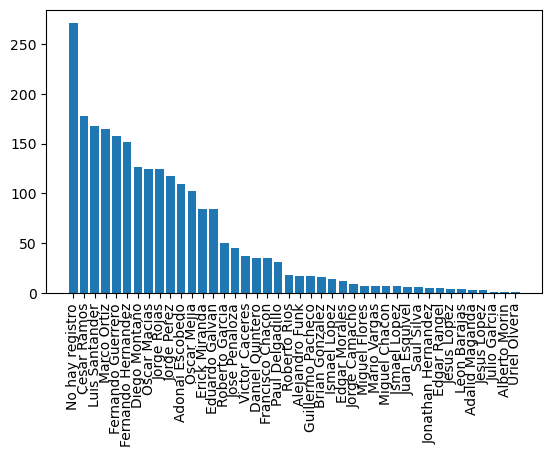

In [37]:
# arbitro, plot a simple bar chart
# To create the data
height = source['Frequency']  #<-- To stablish the height
bars = source['referee']      #<--To stablish the bars

plt.bar(bars, height)                    #<--To create the bars
plt.xticks(bars, rotation=90)            #<--To rotate the bar names
plt.subplots_adjust(bottom=0.4, top=.99) #<--To customize the subplot layout
plt.show()                               #<--To show the graphic

### Mejor equipo local

In [38]:
df_1 = df[df['home_win'] == True]
source = pd.DataFrame(df_1.home_team.value_counts()).reset_index().rename(columns={'index':'team','home_team':'Frequency'})
source

,team,Frequency
0,Tigres UANL,81
1,Club America,79
2,Monterrey,77
3,Santos Laguna,73
4,Cruz Azul,69
5,Pachuca,68
6,Toluca,66
7,Leon,65
8,Club Tijuana,56
9,U.N.A.M. - Pumas,51


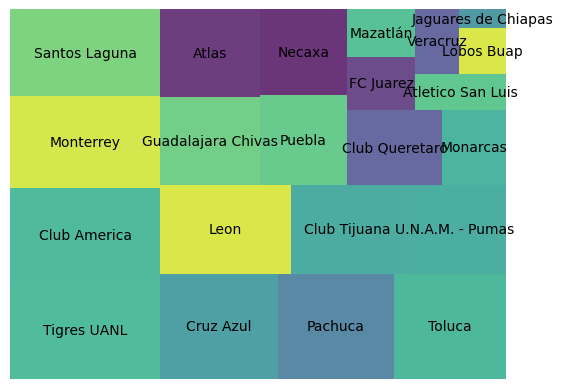

In [39]:
# equipo, plot a simple bar chart
squarify.plot(sizes=source['Frequency'], label=source['team'], alpha=.8)
plt.axis('off')
plt.show()

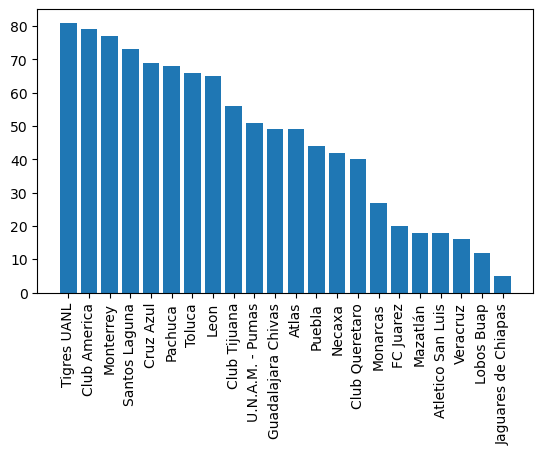

In [40]:
# To create the data
height = source['Frequency']  #<-- To stablish the height
bars = source['team']      #<--To stablish the bars

plt.bar(bars, height)                    #<--To create the bars
plt.xticks(bars, rotation=90)            #<--To rotate the bar names
plt.subplots_adjust(bottom=0.4, top=.99) #<--To customize the subplot layout
plt.show() 

In [41]:
source = pd.pivot_table(df_1, index='home_team', values='home_goals', 
                        aggfunc=np.sum, fill_value=0).reset_index().sort_values(by='home_goals', ascending=False)

# Restablecer los índices
source.reset_index(drop=True, inplace=True)
source

,home_team,home_goals
0,Tigres UANL,206
1,Monterrey,193
2,Club America,191
3,Santos Laguna,187
4,Pachuca,179
5,Toluca,172
6,Leon,169
7,Cruz Azul,150
8,U.N.A.M. - Pumas,130
9,Club Tijuana,120


### Mejor equipo visitante

In [42]:
df_2 = df[df['away_win'] == True]
source = pd.DataFrame(df_2.away_team.value_counts()).reset_index().rename(columns={'index':'team','away_team':'Frequency'})
source

,team,Frequency
0,Club America,59
1,Tigres UANL,55
2,Leon,52
3,Monterrey,48
4,Cruz Azul,42
5,Guadalajara Chivas,41
6,Pachuca,41
7,Puebla,38
8,Toluca,37
9,Necaxa,36


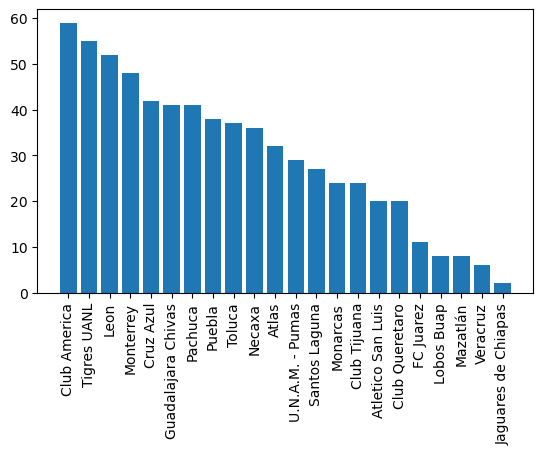

In [43]:
# To create the data
height = source['Frequency']  #<-- To stablish the height
bars = source['team']      #<--To stablish the bars

plt.bar(bars, height)                    #<--To create the bars
plt.xticks(bars, rotation=90)            #<--To rotate the bar names
plt.subplots_adjust(bottom=0.4, top=.99) #<--To customize the subplot layout
plt.show() 

In [44]:
source = pd.pivot_table(df_2, index='away_team', values='away_goals', 
                        aggfunc=np.sum, fill_value=0).reset_index().sort_values(by='away_goals', ascending=False)

# Restablecer los índices
source.reset_index(drop=True, inplace=True)
source

,away_team,away_goals
0,Club America,135
1,Leon,113
2,Tigres UANL,112
3,Monterrey,108
4,Pachuca,107
5,Cruz Azul,88
6,Guadalajara Chivas,82
7,Puebla,80
8,Necaxa,75
9,Toluca,75


## 6. Comentarios adicionales y conclusiones

El EDA es un procedimiento sumamente importante a la hora de analizar un conjunto de datos, mientas mejor identificada y por ende más limpia se encuentre el conjunto de datos será mas sencillo detectar patrones, tendencias que guardan los datos. Sin embargo, al hacer un proceso iterativo, se debe de tener a consideración cuánto vale la pena invertir de tiempo en este punto ya que se podría convertir en un proceso sumamente extenso.

Del analisis podemos concluir lo siguiente:
- America, Tigres y Monterrey se encuentran en el top 5 de equipos con más victorias tanto de local como de visitante, lo cual se ve reflejado en la cantidad titulos, donde Tigres tiene 2, mientras que America y Monterrey tienen 1
- Asimismo, estos tres equipos son los que más puntos han hecho en los últimos años.
- Los arbitros que mas juegos han pitado, Cesar Ramos, Marco Ortiz y Fernando Guerrero cuentan con gafet the FIFA, lo cual presupone que son de los más mejores y más experimentados arbitros en el balompie nacional, lo cual podria explicar que sean los arbitros con más juegos dirigidos